question b
name: himanshu shete(23B0770)

#### 1. Difference between ACF and PACF
- **ACF (Autocorrelation Function)** measures the correlation between a time series and its lagged values.
- **PACF (Partial Autocorrelation function)** shows the correlation between a time series and its lags, but **removes the effect** of intermediate lags.

#### 2. Identifying AR Model Order
- Use the **PACF plot** to identify the lag order `p` of an AR model.
- Look for the **lag after which PACF values drop off** (i.e., become statistically insignificant).

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [30]:
df = pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
df = df.asfreq('MS')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
Index(['#Passengers'], dtype='object')


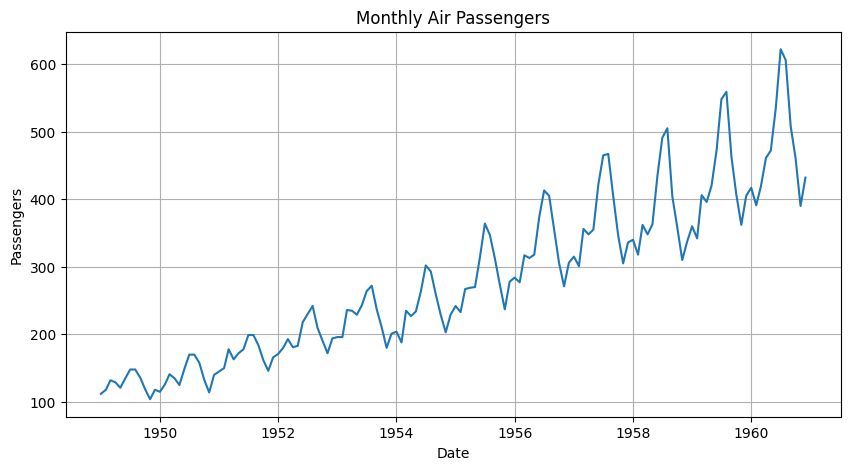

In [31]:
print(df.head())
print(df.columns)
plt.figure(figsize=(10,5))
plt.plot(df['#Passengers'])
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

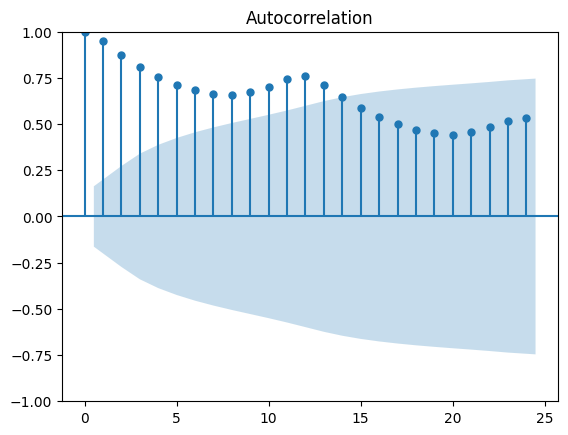

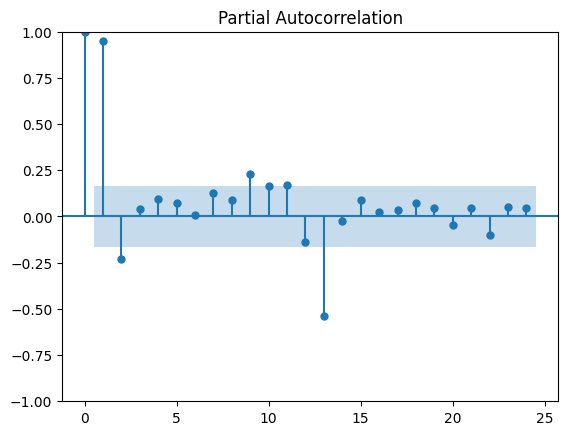

In [32]:
plot_acf(df['#Passengers'], lags=24)
plt.show()

plot_pacf(df['#Passengers'], lags=24, method='ywm')
plt.show()

In [33]:
train = df[:'1959']
test = df['1960':]

In [34]:
model = AutoReg(train['#Passengers'], lags=2)
model_fit = model.fit()

pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [35]:
mse = mean_squared_error(test['#Passengers'], pred)
print("Test MSE:", mse)

Test MSE: 17704.740437876488


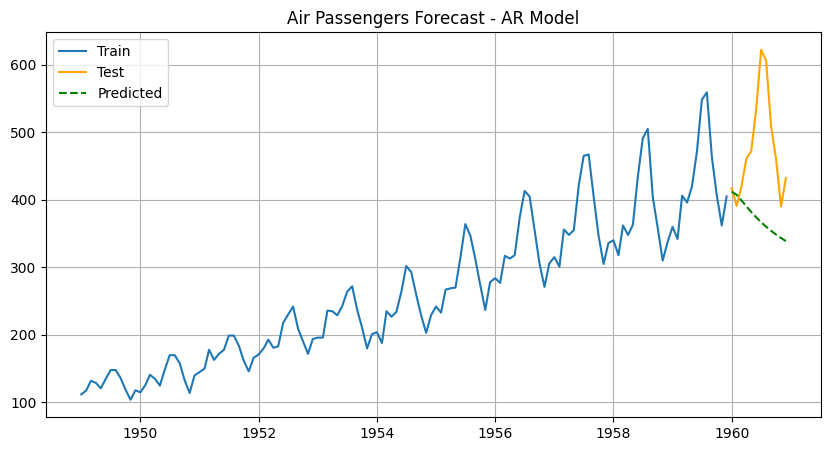

In [36]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train['#Passengers'], label='Train')
plt.plot(test.index, test['#Passengers'], label='Test', color='orange')
plt.plot(test.index, pred, label='Predicted', color='green', linestyle='--')
plt.title('Air Passengers Forecast - AR Model')
plt.legend()
plt.grid(True)
plt.show()